# AutoEncoder 노이즈 제거
---
- 데이터에 노이즈 제거 활용
- 데이터에서 주요 특징만 추출 압축하기 때문에 노이즈는 주요 특징에서 제거
- 압축된 주요 특징으로 데이터 복원 => 노이즈 제거

In [146]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [147]:
(x_train,y_train),(x_test,y_test) = load_data()

In [148]:
x_train = x_train/255
x_test = x_test/255

In [149]:
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)

In [150]:
# 데이터셋에 노이즈 추가
# np.random.normal(평균loc =0.0, 표준편차scale=1.0, size=None)
x_train_noised = x_train + np.random.normal(0,0.5,size = x_train.shape)
x_test_noised = x_test + np.random.normal(0,0.5,size = x_test.shape)

# 픽셀범위 0.0 ~ 1.0 벗어나는 픽셀값 조정 no.clip(array, min, max)
x_train_noised = np.clip(x_train_noised, a_min = 0, a_max =1)
x_test_noised = np.clip(x_test_noised, a_min = 0, a_max =1)

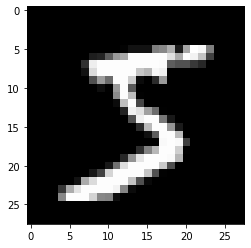

In [151]:
plt.imshow(x_train[0].reshape(28,28),cmap='gray')
plt.show()

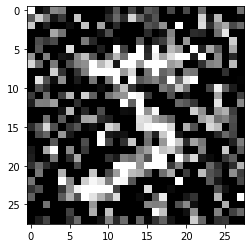

In [152]:
plt.imshow(x_train_noised[0].reshape(28,28),cmap='gray')
plt.show()

In [153]:
def createModel(n_node):
  model = Sequential()
  model.add(Dense(units = n_node, activation='relu', input_shape = (784,)))
  model.add(Dense(784, activation='sigmoid'))
  model.compile(loss = 'mean_squared_error',
                optimizer = 'adam')
  return model

In [154]:
Model10 = createModel(10)
Model50 = createModel(50)
Model100 = createModel(100)
Model500 = createModel(500)
Model1000 = createModel(1000)

# 노이즈, 노이즈 데이터로 학습 

In [155]:
Model10.fit(x_train_noised,x_train,epochs=10)
Model50.fit(x_train_noised,x_train,epochs=10)
Model100.fit(x_train_noised,x_train,epochs=10)
Model500.fit(x_train_noised,x_train,epochs=10)
Model1000.fit(x_train_noised,x_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0524
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0365
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0359
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0357
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0356
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0354
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0353
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0352
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0351
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0349
Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0365
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0210
Epo

In [156]:
pre_out10 = Model10.predict(x_test_noised[0].reshape(-1,784))
pre_out50 = Model50.predict(x_test_noised[0].reshape(-1,784))
pre_out100 = Model100.predict(x_test_noised[0].reshape(-1,784))
pre_out500 = Model500.predict(x_test_noised[0].reshape(-1,784))
pre_out1000 = Model1000.predict(x_test_noised[0].reshape(-1,784))

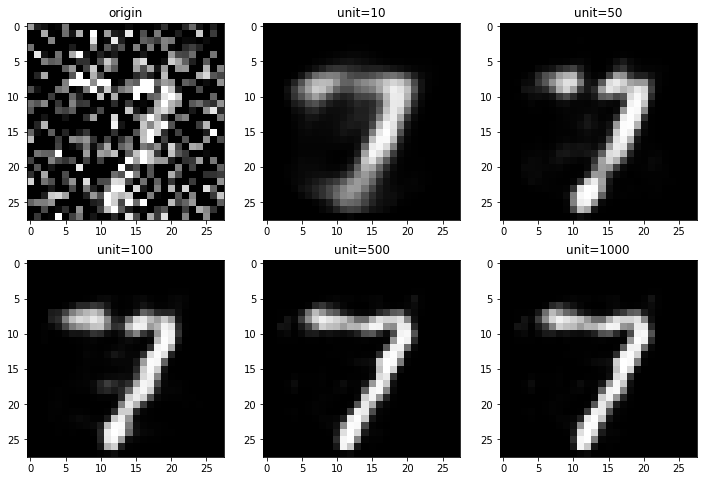

In [157]:
plt.figure(figsize=(16,12))

plt.subplot(2, 3, 1) 
plt.title('origin')
plt.imshow(x_test_noised[0].reshape(28,28),cmap='gray')

plt.subplot(2, 3, 2) 
plt.imshow(pre_out10.reshape(28,28),cmap ='gray')
plt.title('unit=10')

plt.subplot(2, 3, 3) 
plt.imshow(pre_out50.reshape(28,28),cmap ='gray')
plt.title('unit=50')

plt.subplot(2, 3, 4) 
plt.imshow(pre_out100.reshape(28,28),cmap ='gray')
plt.title('unit=100')

plt.subplot(2, 3, 5) 
plt.imshow(pre_out500.reshape(28,28),cmap ='gray')
plt.title('unit=500')

plt.subplot(2, 3, 6) 
plt.imshow(pre_out500.reshape(28,28),cmap ='gray')
plt.title('unit=1000')

plt.show()


# CNN으로 노이즈 제거

In [157]:
def createAE_cnn(n_node):
  model = Sequential()
  #입력
  model.add(Dense(units = n_node, activation='relu', input_shape(784,)))

  #출력
  